### Práctica de PCA y SOMs

Using the [Human Activity Recognition dataset from Smartphones](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones), perform dimensionality reduction study using PCA, in order to habe good clusters.

With the principal components obtained after observing the cumulative variance ratios (CVRs), generate a new dataset with these PCs and perform several clustering operations using Hierarchical Clustering, k-means and Self Organizing Maps (SOMs).

In [4]:
import pandas as pd
# Load data
X_train = pd.read_csv('./datasets/uci/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('./datasets/uci/train/y_train.txt', delim_whitespace=True, header=None)



C:\Users\cberd\AppData\Local\Temp\ipykernel_22252\550358619.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('./datasets/uci/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\cberd\AppData\Local\Temp\ipykernel_22252\550358619.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('./datasets/uci/train/y_train.txt', delim_whitespace=True, header=None)


In [5]:
X_train.shape

(7352, 561)

In [6]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [7]:
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()
standardized.fit(X_train)
X_train = standardized.transform(X_train)


## 1 - PCA

Reducimos la dimensionalidad de los datos a 3 componentes principales y lo visualizamos

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X_train)

In [31]:
X_pca.shape

(7352, 2)

Visualizamos:

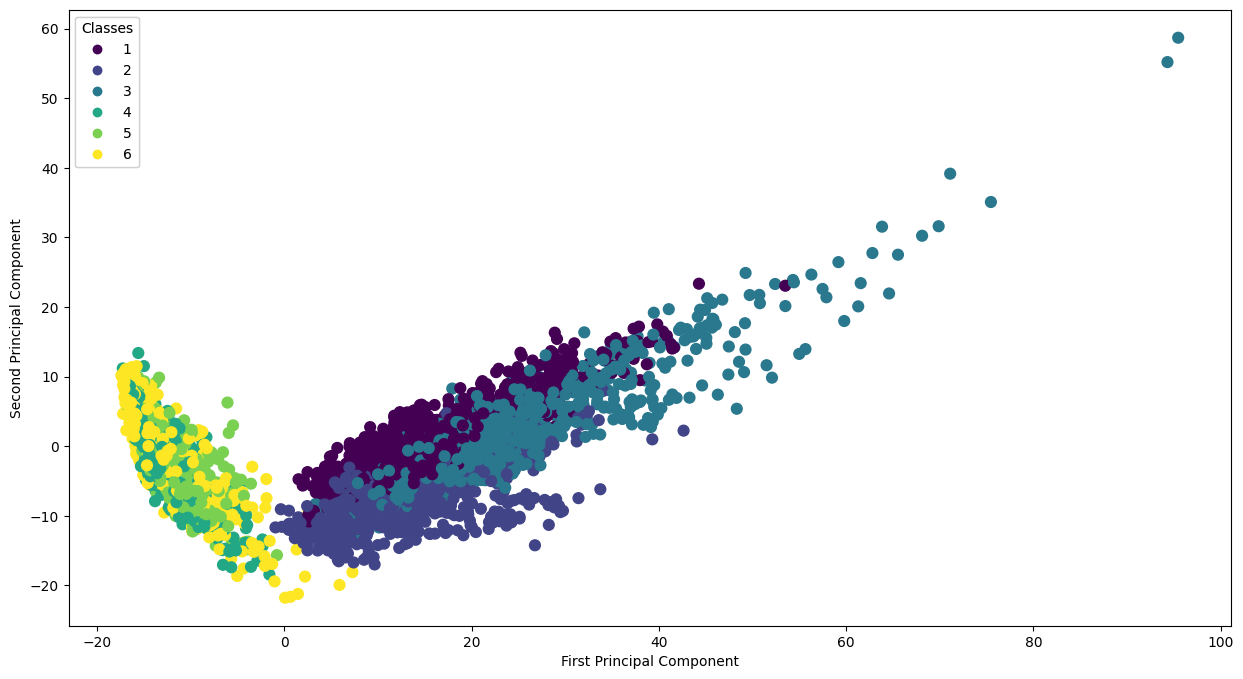

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], s=60, c=y_train[0], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
plt.show()


Podríamos visualizar la importancia de cada variable en los componentes principales, de la siguiente forma:

In [11]:
X_train_df = pd.DataFrame(X_train)
df_pc = pd.DataFrame(pca.components_, columns=X_train_df.columns)

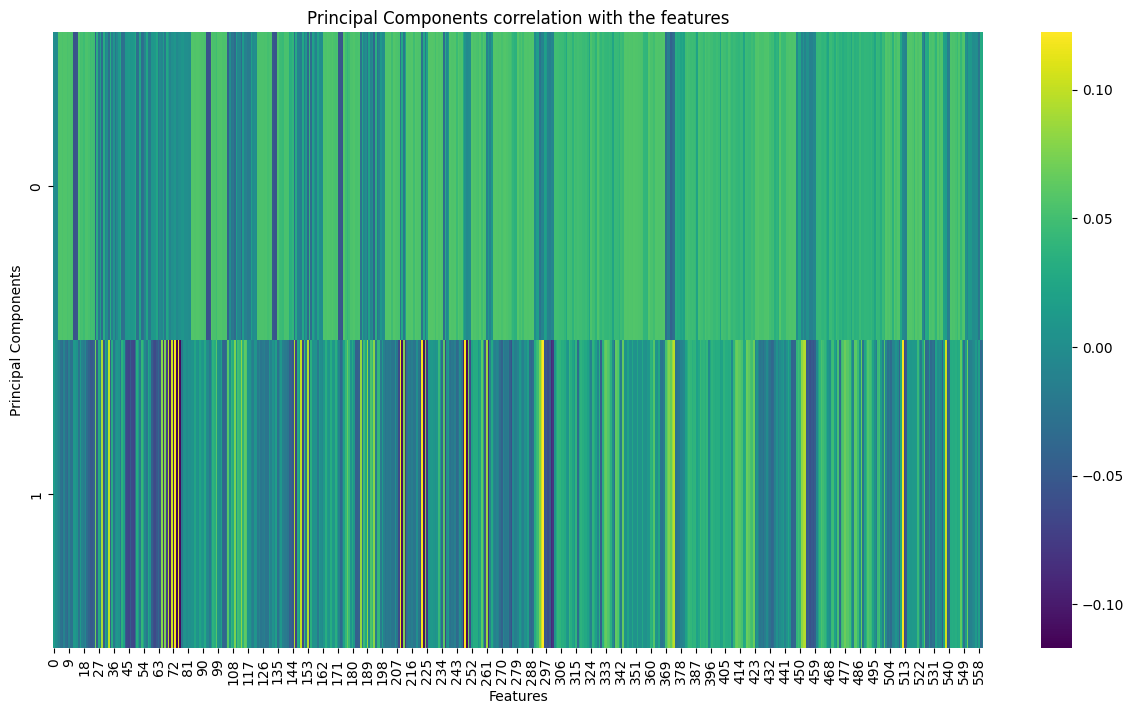

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

## 2 - Clustering


### K-Means

Méotdo del codo:

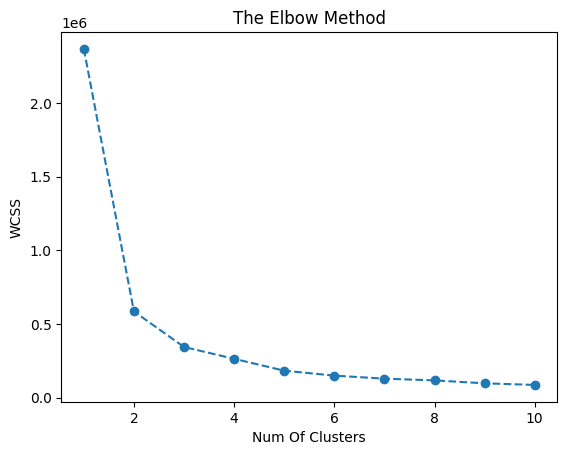

In [13]:
from sklearn.cluster import KMeans
#Método del Codo podemos obtener el nº de clusters
WCSS =  [ ]
for i in range(1, 11):
    km = KMeans(n_clusters= i, init='k-means++', random_state=0)
    km.fit(X_pca)
    WCSS.append(km.inertia_)

plt.plot(range(1,11),WCSS, marker='o',linestyle='dashed')
plt.title('The Elbow Method')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.show()

Parece ser que el nº de clusters óptimo es 2. Calculamos el K-means

In [14]:
clusterer = KMeans(n_clusters=2, random_state=10)
y_mean = clusterer.fit_predict(X_pca)


Calculamos el score de silhouete para el K-means

In [15]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=2): {silhouette_score(X_pca, y_mean)}')

Silhouette Score(n=2): 0.70159107430713


Volvemos a plotear los datos con los clusters obtenidos.

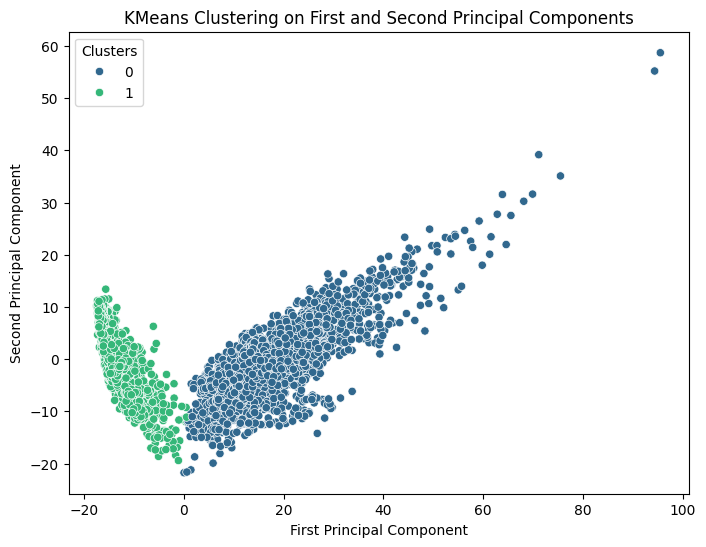

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_mean, palette='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on First and Second Principal Components')
plt.legend(title='Clusters')                                                                                                                                                            
plt.show()


El score de silhouete para 6 clusters es: 0.45, lo cual es muy inferior al obtenido con 2 clusters. Esto nos da una pista, que con K-means no obtendremos la mejor división.

### Clustering Jerárquico

Probamos a hacer clustering jerárquico con diferentes métodos de enlace (ward, complete, average, single). Visualizamos el resultado y el dendograma para cada uno de ellos.

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_agglomerative_clustering(n_clusters):
    linkages = ['ward', 'single', 'complete', 'average']

    for link in linkages:
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
        agglo.fit(X_pca)
        myColors = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow',} 

        print(f"Linkage: {link}")

        fig = plt.figure(figsize=(15, 8))
        ax = fig.add_subplot(111)
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
        legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
        ax.add_artist(legend1)
        ax.set_xlabel('First Principal Component')
        ax.set_ylabel('Second Principal Component')
        plt.title(f'Agglomerative with Linkage {link}')
        plt.show()

        # Generate the linkage matrix
        Z = linkage(X_pca, link)

        # Plot the dendrogram
        plt.figure(figsize=(10, 7))
        dendrogram(Z)
        plt.title(f'Dendrogram of Linkage {link}')
        plt.xlabel('Samples')
        plt.ylabel('Distance')
        plt.show()



Linkage: ward


c:\Users\cberd\Desktop\Master\Modulo8MachineLearning\Evaluation\Part 2 - Homework 2 - PCA and Clustering with Self Organizing Maps (Advanced)\.venv\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


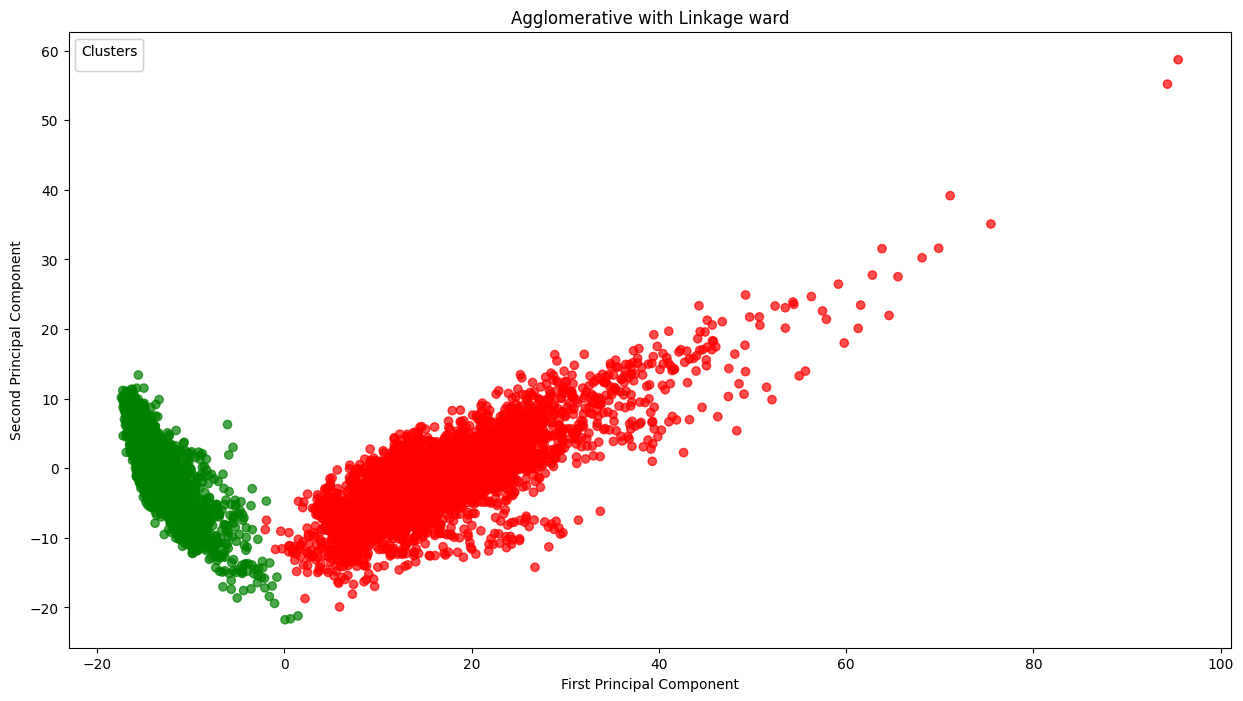

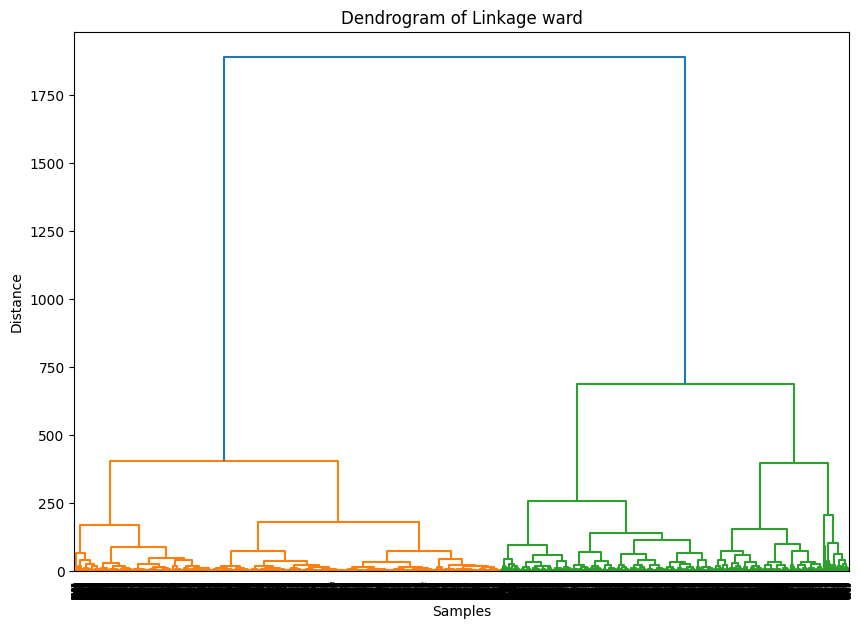

Linkage: single


c:\Users\cberd\Desktop\Master\Modulo8MachineLearning\Evaluation\Part 2 - Homework 2 - PCA and Clustering with Self Organizing Maps (Advanced)\.venv\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


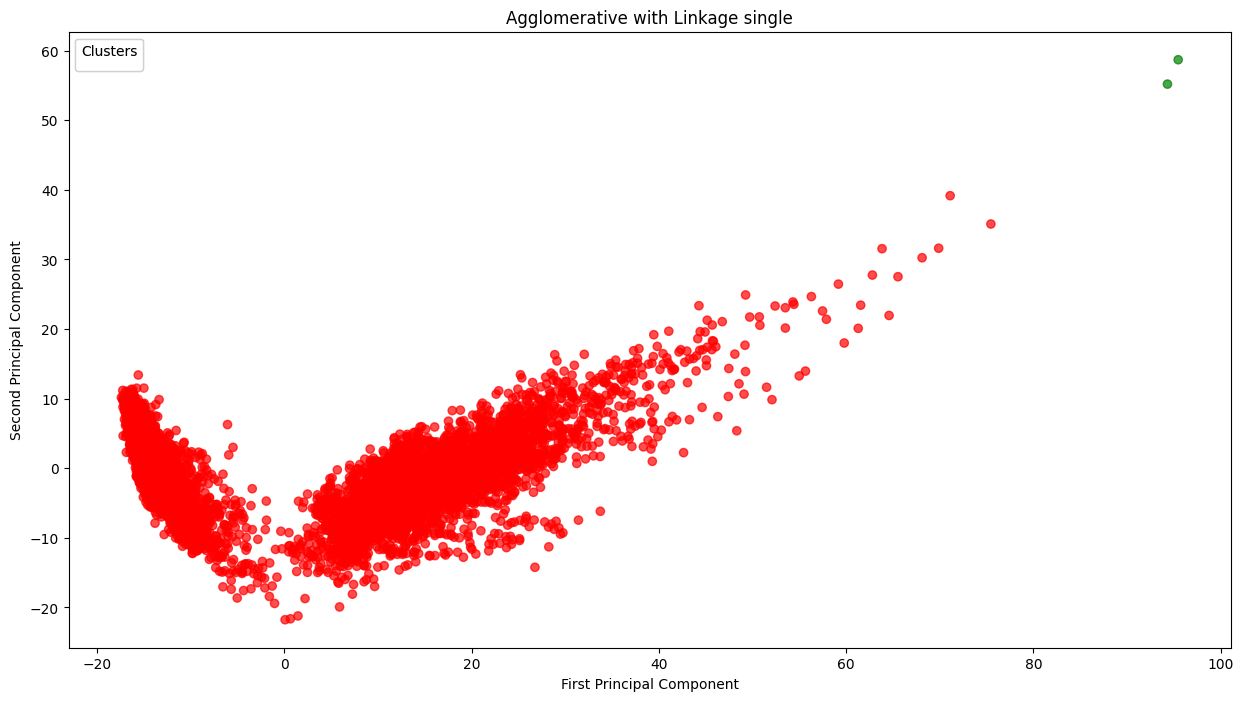

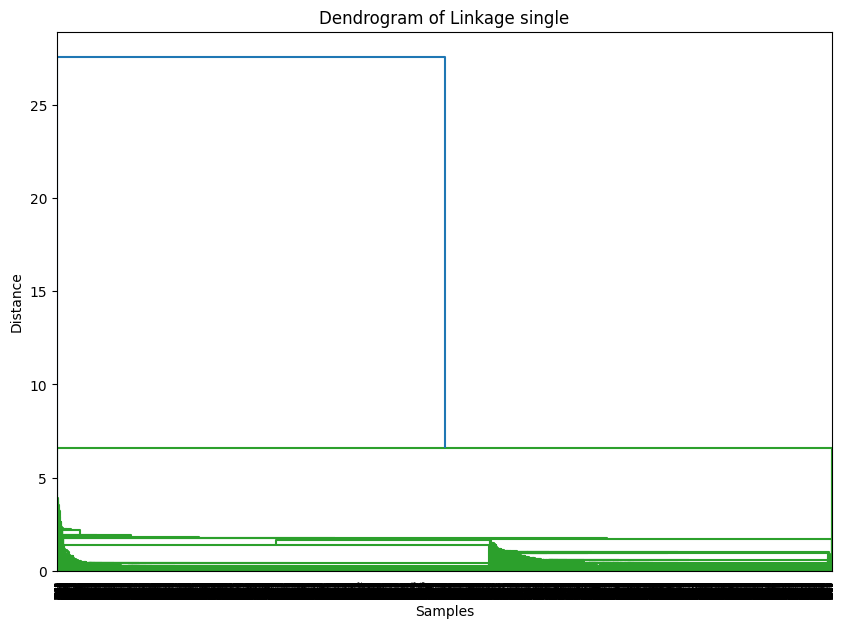

Linkage: complete


c:\Users\cberd\Desktop\Master\Modulo8MachineLearning\Evaluation\Part 2 - Homework 2 - PCA and Clustering with Self Organizing Maps (Advanced)\.venv\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


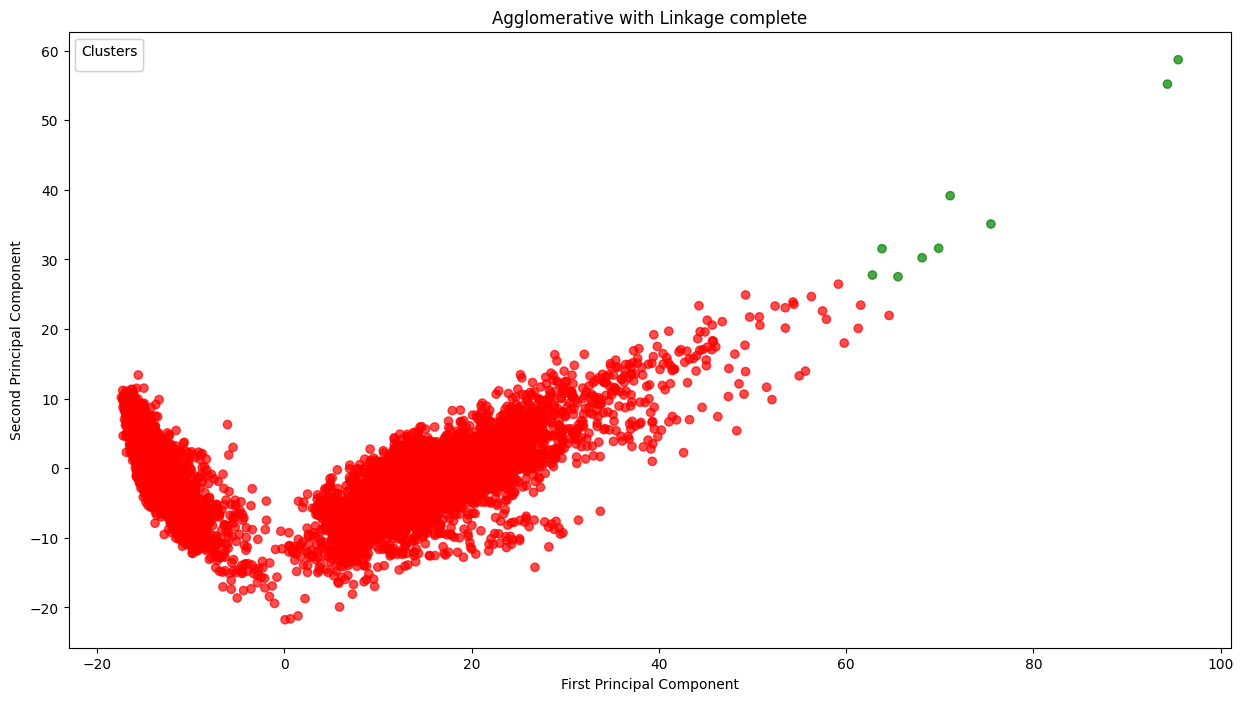

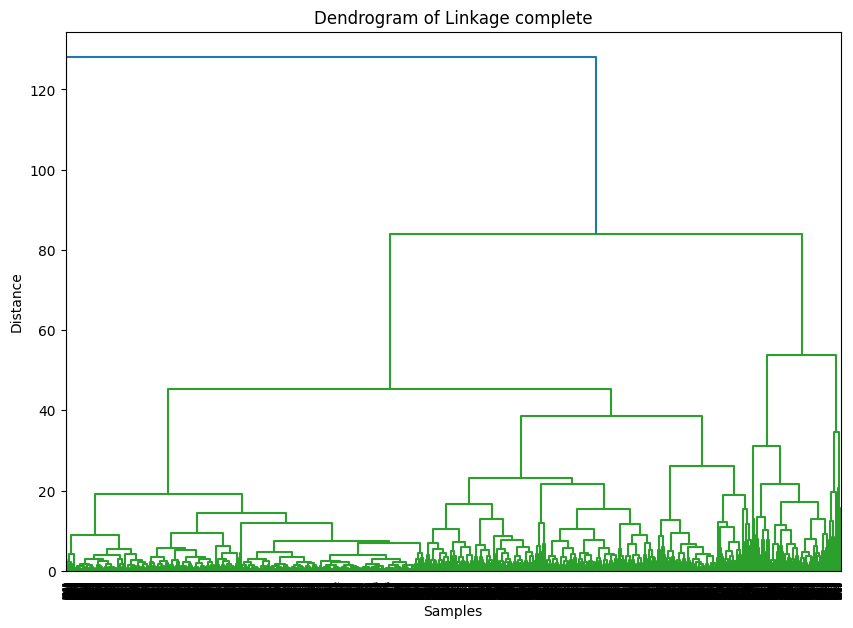

Linkage: average


c:\Users\cberd\Desktop\Master\Modulo8MachineLearning\Evaluation\Part 2 - Homework 2 - PCA and Clustering with Self Organizing Maps (Advanced)\.venv\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


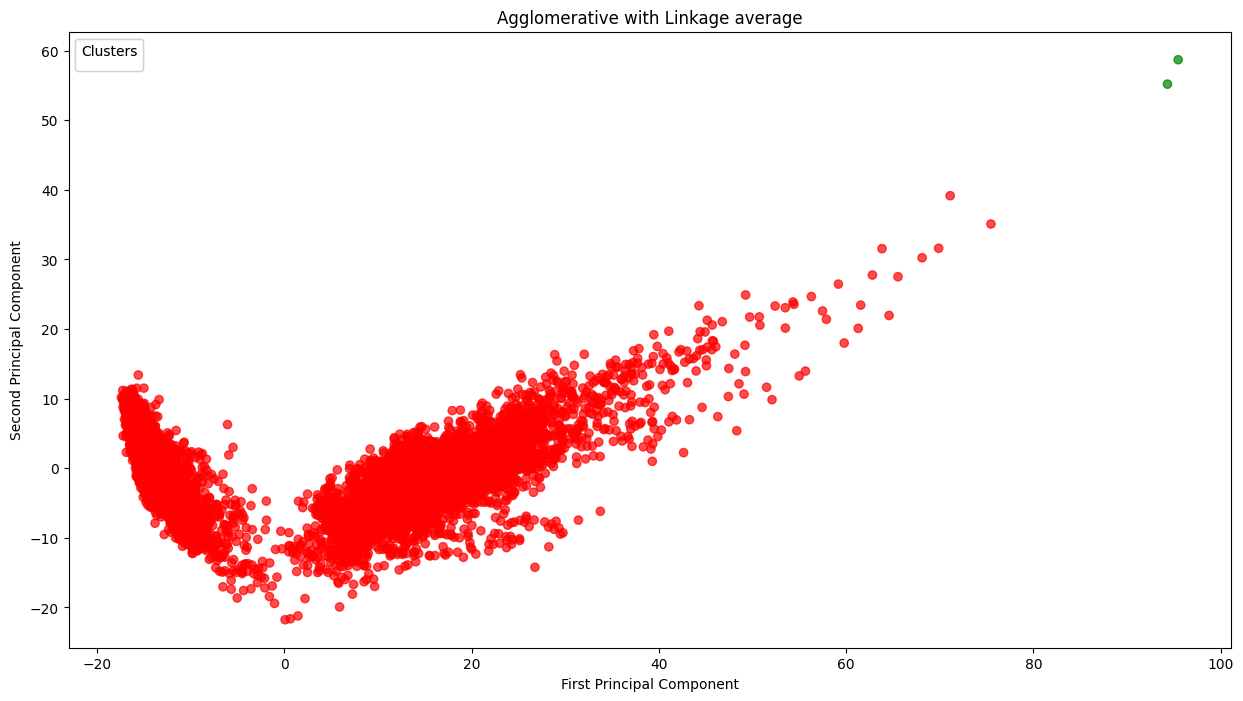

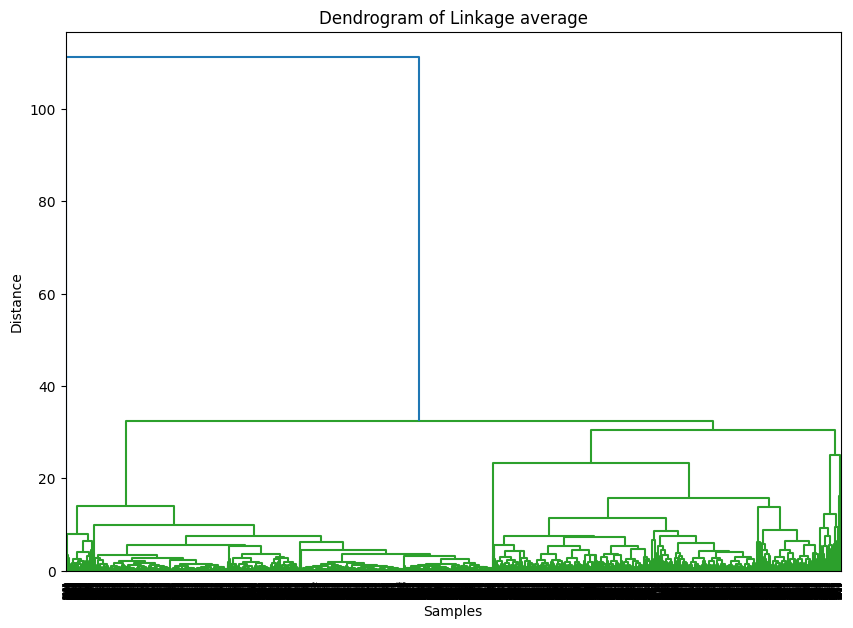

In [28]:
# Example usage:
plot_agglomerative_clustering(n_clusters=2)

Tampoco es el clustering que mejor funciona, pero dentro del clustering jerárquico el linkage  ward y complete se comportan mejor.

Linkage: ward


KeyError: 5

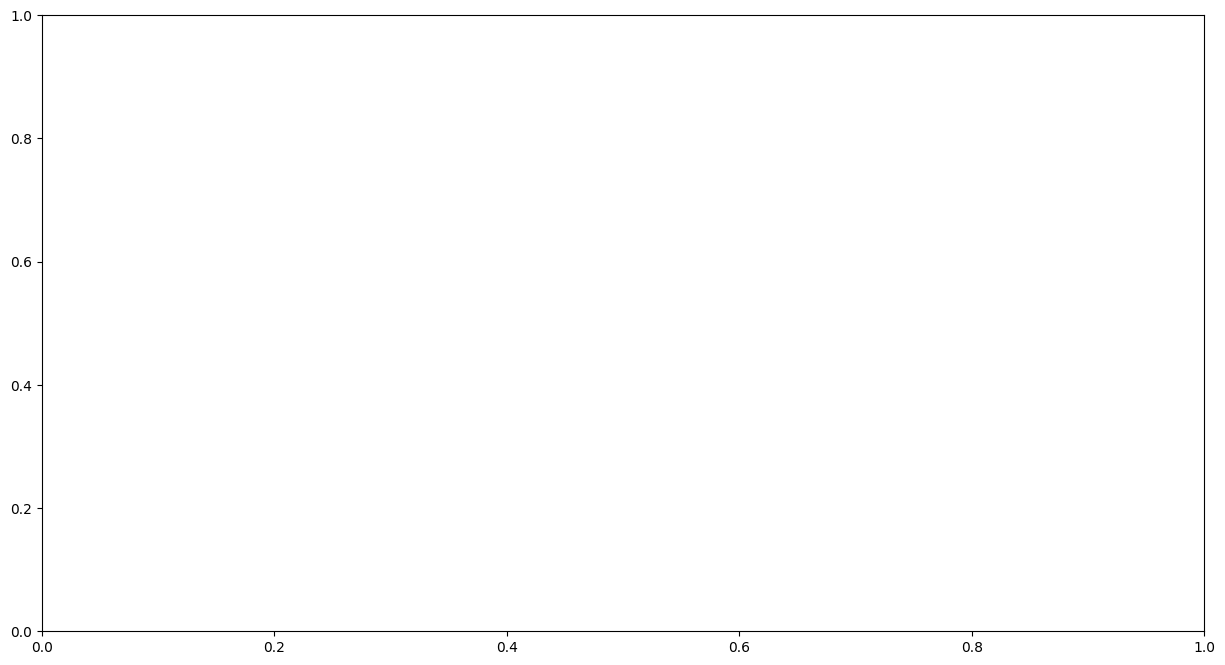

In [29]:
# Example usage:
plot_agglomerative_clustering(n_clusters=6)

### Self Organizing Maps

Se crea un mapa autoorganizado (SOM) de 9x9 neuronas usando la biblioteca `MiniSom`. 
El SOM se inicializa con pesos basados en PCA (`pca_weights_init`) y se entrena con 1000 iteraciones utilizando la función de vecindad gaussiana. 
El parámetro `sigma=1.5` controla la extensión de la vecindad y `learning_rate=0.5` define la tasa de aprendizaje. 
El SOM tiene una topología rectangular y se entrena de manera aleatoria (`random training`).

In [21]:
from minisom import MiniSom

# Initialization and training
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, X_pca.shape[1], sigma=1.5, learning_rate=.5, neighborhood_function='gaussian', random_seed=0, topology='rectangular')

som.pca_weights_init(X_pca)
som.train(X_pca, 1000, verbose=False)  # random training

c:\Users\cberd\Desktop\Master\Modulo8MachineLearning\Evaluation\Part 2 - Homework 2 - PCA and Clustering with Self Organizing Maps (Advanced)\.venv\Lib\site-packages\minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


In [22]:
unique_values = y_train[0].unique()
print(unique_values.size)

6


Se visualiza el mapa de distancias (`distance_map()`) del SOM entrenado usando un mapa de color (`cmap='bone_r'`). 
El mapa de distancias refleja la similitud de los pesos de las neuronas vecinas: 
- Los colores claros indican áreas de baja distancia (alta similitud). 
- Los colores oscuros indican áreas de alta distancia (bordes de clústeres).

Cada muestra de entrenamiento se representa con un marcador específico según su clase (`target`), 
utilizando diferentes formas y colores (`markers` y `colors`). 
El marcador se coloca en la posición de la neurona ganadora (`som.winner(xx)`) en el mapa SOM.


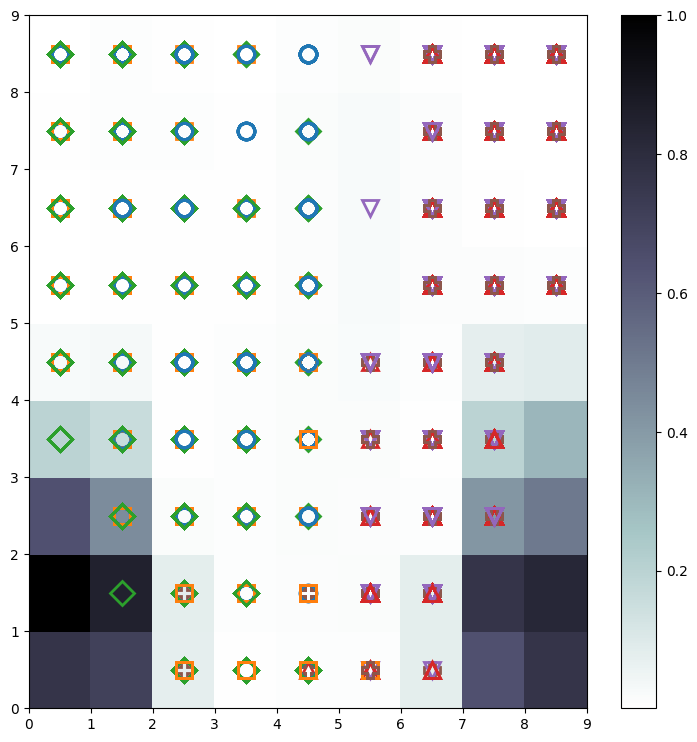

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


target =  y_train.values.flatten()


plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D', '^', 'v', 'P'] 
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']  
for cnt, xx in enumerate(X_pca):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
            markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

Interpretación: 

Las áreas con muchos marcadores superpuestos (especialmente en las celdas con fondo oscuro) nos da a entender una falta de separación clara entre las clases en el espacio reducido por el SOM.
Las celdas con un solo tipo de marcador muestran buenas agrupaciones (clustering) de esa clase específica.

---
Ahora vamos a mostrar un mapa de calor de las frecuencias de activación de las neuronas del Self-Organizing Map (SOM). 
La función `som.activation_response(X_pca)` devuelve cuántas veces cada neurona fue la ganadora al clasificar los datos de entrada (`X_pca`).

El mapa de calor (`cmap='Blues'`) refleja:
- Colores más oscuros = Baja activación.
- Colores más claros = Alta activación.




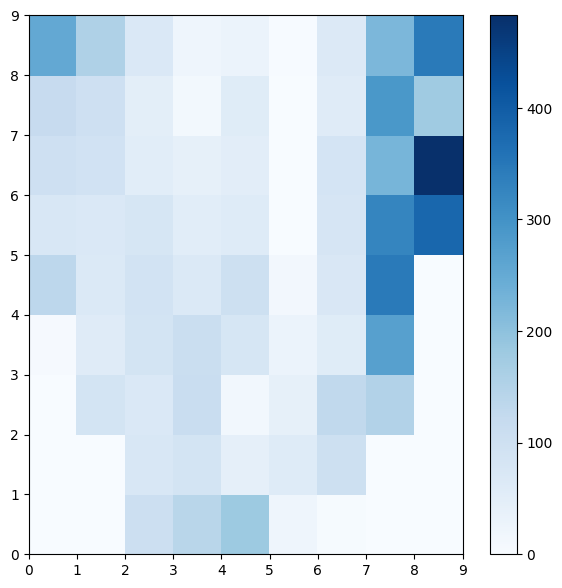

In [24]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(X_pca)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

---
A continuación se muestra la distribución de las etiquetas (actividades) en cada neurona del SOM mediante pie chart 

- Cada celda del SOM contiene un gráfico circular que indica la proporción de las diferentes etiquetas presentes en esa neurona.
- El tamaño relativo de cada sección en el gráfico circular refleja la frecuencia de cada clase en esa neurona.

Esta visualización ayuda a identificar áreas del SOM especializadas en ciertas clases, así como posibles mezclas o confusiones entre las actividades.


C:\Users\cberd\AppData\Local\Temp\ipykernel_22252\681363949.py:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


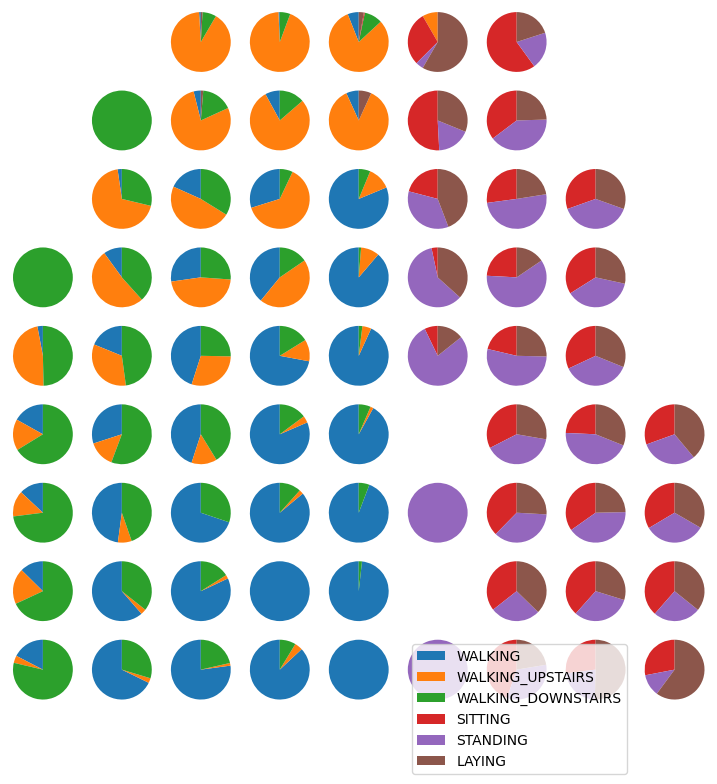

In [25]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# Definir los nombres de las etiquetas
label_names = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 
               4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

# Crear el mapa de etiquetas usando el SOM
labels_map = som.labels_map(X_pca, [label_names[t] for t in target])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)

for position, label_counts in labels_map.items():
    # Obtener las frecuencias de cada etiqueta en la celda actual
    label_fracs = [label_counts.get(label, 0) for label in label_names.values()]
    
    plt.subplot(the_grid[position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs, startangle=90)
    plt.axis('equal')

plt.legend(patches, label_names.values(), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


Se entrena el SOM de 10x10 neuronas durante 200 iteraciones, evaluando las siguientes métricas en cada paso:

1. **Quantization Error** (`quantization_error`): 
   - Mide la distancia promedio entre cada dato y su neurona ganadora. 
   - Valores más bajos indican que los datos están bien representados por el SOM.

2. **Topographic Error** (`topographic_error`): 
   - Indica cuántos datos no tienen sus dos neuronas más cercanas adyacentes en el mapa.
   - Un valor bajo sugiere que la estructura topológica de los datos se preserva bien en el SOM.

3. **Divergence Measure** (`distortion_measure`): 
   - Evalúa la distorsión de los datos en el mapa.
   - Un menor valor indica una mejor organización de los pesos del SOM.

Los gráficos muestran la evolución de estas métricas a lo largo de las iteraciones, ayudando a determinar si el SOM ha alcanzado la convergencia o si necesita más entrenamiento.

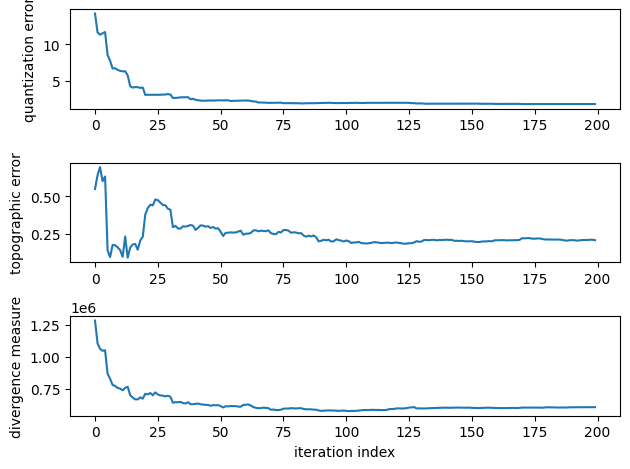

In [26]:
import numpy as np
som = MiniSom(10, 10, X_pca.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 200
q_error = []
t_error = []
d_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X_pca))
    som.update(X_pca[rand_i], som.winner(X_pca[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X_pca))
    t_error.append(som.topographic_error(X_pca))
    d_error.append(som.distortion_measure(X_pca))

plt.subplot(3,1,1)
plt.plot(np.arange(max_iter), q_error)
plt.ylabel('quantization error')
plt.subplot(3,1,2)
plt.plot(np.arange(max_iter), t_error)
plt.ylabel('topographic error')
plt.subplot(3,1,3)
plt.plot(np.arange(max_iter), d_error)
plt.ylabel('divergence measure')
plt.xlabel('iteration index')
plt.tight_layout()
plt.show()